In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [2]:
os.chdir(r'/Users/harishbhupalam/Desktop/FinHack')

df = pd.read_csv('transaction_dataset.csv')
df

,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,1,0x0020731604c882cf7bf8c444be97d17b19ea4316,1,1457.31,34.12,4815.43,3,13,0,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0x002bf459dc58584d58886169ea0e80f3ca95ffaf,1,3976.50,834.77,9622.53,2,2,0,1,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
2,3,0x002f0c8119c16d310342d869ca8bf6ace34d9c39,1,112.90,31.87,321.42,2,3,0,3,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
3,4,0x0059b14e35dab1b4eee1e2926c7a5660da66f747,1,2300.37,65.10,73091.00,29,98,0,89,...,0.000000,81324.074600,5232.816018,0.0,0.0,0.0,22.0,37.0,OCoin,OCoin
4,5,0x005b9f4516f8e640bbe48136901738b323c53b00,1,0.00,0.00,0.00,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,4725,0xce0fd2c44bdef2efcec767e4585c54dcef420c2a,0,0.00,5423.43,157279.52,0,29,1,5,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.0,None,OmiseGO
9837,4726,0xce213bb7270db93558d9c6acb1b39573ed049869,0,17069.33,4865.25,789644.82,36,36,0,27,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.0,None,VIU
9838,4727,0xce227cc7780a66056b26f3ef1f7a34189a0be3ad,0,3905.19,28297.95,774798.50,10,26,0,6,...,2.167806,2.167806,2.167806,0.0,0.0,0.0,1.0,2.0,OmiseGO,OmiseGO
9839,4728,0xce253bc8dcb9ba1fe5cca791d92c741bc88e40bc,0,0.00,2111.70,291414.15,0,138,1,3,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,4.0,None,OmiseGO


In [3]:
count_ones = df['FLAG'].sum()
print(count_ones)

2179


In [4]:
df = df.drop(columns=['Index', 'Address',' ERC20 most sent token type',' ERC20_most_rec_token_type'])
df

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
0,1,1457.31,34.12,4815.43,3,13,0,10,3,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,3976.50,834.77,9622.53,2,2,0,1,2,0.586269,...,1.337000,1.337000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0
2,1,112.90,31.87,321.42,2,3,0,3,1,0.001020,...,1.337000,1.337000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0
3,1,2300.37,65.10,73091.00,29,98,0,89,26,0.000784,...,26436.081000,1954.484697,0.000000,81324.074600,5232.816018,0.0,0.0,0.0,22.0,37.0
4,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,0,0.00,5423.43,157279.52,0,29,1,5,0,0.000000,...,600.000000,300.903916,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.0
9837,0,17069.33,4865.25,789644.82,36,36,0,27,6,0.010014,...,66.250400,34.394365,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.0
9838,0,3905.19,28297.95,774798.50,10,26,0,6,3,0.005000,...,600.000000,301.083903,2.167806,2.167806,2.167806,0.0,0.0,0.0,1.0,2.0
9839,0,0.00,2111.70,291414.15,0,138,1,3,0,0.000000,...,3.387294,1.314073,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,4.0


In [5]:
df.isnull().sum()

FLAG                                                      0
Avg min between sent tnx                                  0
Avg min between received tnx                              0
Time Diff between first and last (Mins)                   0
Sent tnx                                                  0
Received Tnx                                              0
Number of Created Contracts                               0
Unique Received From Addresses                            0
Unique Sent To Addresses                                  0
min value received                                        0
max value received                                        0
avg val received                                          0
min val sent                                              0
max val sent                                              0
avg val sent                                              0
min value sent to contract                                0
max val sent to contract                

In [6]:
n = 23

# Load the last n column names into a variable
variables = df.iloc[:, -n:].columns.tolist()
class_value = 1

# Loop through each variable and impute the mean of the given class for null values
for var in variables:
    mean = df[df['FLAG'] == class_value][var].mean()  # Calculate the mean for the given class and variable
    df.loc[(df['FLAG'] == class_value) & (df[var].isnull()), var] = mean  # Impute the mean for null values of the variable and class


In [7]:
df.isnull().sum()

FLAG                                                    0
Avg min between sent tnx                                0
Avg min between received tnx                            0
Time Diff between first and last (Mins)                 0
Sent tnx                                                0
Received Tnx                                            0
Number of Created Contracts                             0
Unique Received From Addresses                          0
Unique Sent To Addresses                                0
min value received                                      0
max value received                                      0
avg val received                                        0
min val sent                                            0
max val sent                                            0
avg val sent                                            0
min value sent to contract                              0
max val sent to contract                                0
avg value sent

In [8]:
no_var = df.var() == 0
df.var()[no_var]

 ERC20 avg time between sent tnx        0.0
 ERC20 avg time between rec tnx         0.0
 ERC20 avg time between rec 2 tnx       0.0
 ERC20 avg time between contract tnx    0.0
 ERC20 min val sent contract            0.0
 ERC20 max val sent contract            0.0
 ERC20 avg val sent contract            0.0
dtype: float64

In [9]:
df.drop(df.var()[no_var].index, axis = 1, inplace = True)
df

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
0,1,1457.31,34.12,4815.43,3,13,0,10,3,1.000000,...,0.002963,4.140741,934.591286,1.698577e+07,8.366339e+06,75400.678490,8.341266e+07,4.160523e+07,1.533333,4.10963
1,1,3976.50,834.77,9622.53,2,2,0,1,2,0.586269,...,0.000000,1.000000,1.337000,1.337000e+00,1.337000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,1.00000
2,1,112.90,31.87,321.42,2,3,0,3,1,0.001020,...,0.000000,1.000000,1.337000,1.337000e+00,1.337000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,1.00000
3,1,2300.37,65.10,73091.00,29,98,0,89,26,0.000784,...,0.000000,37.000000,0.000000,2.643608e+04,1.954485e+03,0.000000,8.132407e+04,5.232816e+03,22.000000,37.00000
4,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,...,0.002963,4.140741,934.591286,1.698577e+07,8.366339e+06,75400.678490,8.341266e+07,4.160523e+07,1.533333,4.10963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,0,0.00,5423.43,157279.52,0,29,1,5,0,0.000000,...,0.000000,2.000000,1.807831,6.000000e+02,3.009039e+02,0.000000,0.000000e+00,0.000000e+00,0.000000,2.00000
9837,0,17069.33,4865.25,789644.82,36,36,0,27,6,0.010014,...,0.000000,2.000000,2.538329,6.625040e+01,3.439437e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,2.00000
9838,0,3905.19,28297.95,774798.50,10,26,0,6,3,0.005000,...,0.000000,2.000000,2.167806,6.000000e+02,3.010839e+02,2.167806,2.167806e+00,2.167806e+00,1.000000,2.00000
9839,0,0.00,2111.70,291414.15,0,138,1,3,0,0.000000,...,0.000000,4.000000,0.000000,3.387294e+00,1.314073e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,4.00000


In [10]:
a = df.drop(columns = ['FLAG'])
b = df['FLAG']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(a, b, test_size=0.3, random_state=1, stratify=df['FLAG'])

In [12]:
x_train

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,...,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
5157,3763.26,14992.81,1077405.07,111,44,0,15,71,0.040,50.000000,...,0.0,13.0,0.000,17384.000,1325.968217,0.644262,124.877043,38.831388,3.0,13.0
1502,0.00,55.27,1259.47,1,20,0,20,1,0.001,8.440819,...,0.0,1.0,1.337,1.337,1.337000,0.000000,0.000000,0.000000,0.0,1.0
4280,11200.08,5511.61,234671.05,18,6,0,6,8,0.050,10.000000,...,0.0,5.0,0.000,1.000,0.100001,0.000000,9999.000000,1000.000001,4.0,5.0
2270,13.67,40512.33,688942.00,17,17,0,5,3,0.010,69.995000,...,0.0,0.0,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3853,4.90,27760.76,305402.67,7,11,0,9,1,0.001,23.000000,...,0.0,0.0,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3179,13.12,633.82,217031.22,310,336,0,2,11,0.001,16.945000,...,0.0,0.0,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
8806,29246.56,0.00,58493.12,2,1,0,1,2,2.000,2.000000,...,0.0,0.0,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
9478,32.14,33667.32,1044651.02,30,31,0,1,1,0.500,1.083039,...,0.0,0.0,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4839,3.72,7488.96,22478.05,3,3,0,1,3,0.995,4.095000,...,0.0,0.0,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [13]:
scaler = StandardScaler()

# fit and transform the data
x = scaler.fit_transform(x_train)

# convert the numpy array back to a dataframe
x = pd.DataFrame(x, columns=x_train.columns)

y = y_train
x

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,...,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
0,-0.060329,0.325497,2.642348,-0.012266,-0.127166,-0.024652,-0.051221,0.143737,-0.136941,-0.037178,...,-0.054706,0.523022,-0.033454,-0.013389,-0.024134,-0.233664,-0.279320,-0.303127,0.248732,0.541200
1,-0.239771,-0.354074,-0.675165,-0.155556,-0.153116,-0.024652,-0.033860,-0.097302,-0.137077,-0.039933,...,-0.054706,-0.257411,-0.033384,-0.013390,-0.024139,-0.233685,-0.279325,-0.303131,-0.226738,-0.259509
2,0.294277,-0.105843,0.044390,-0.133411,-0.168253,-0.024652,-0.082470,-0.073199,-0.136906,-0.039829,...,-0.054706,0.002733,-0.033454,-0.013390,-0.024139,-0.233685,-0.278951,-0.303044,0.407222,0.007394
3,-0.239119,1.486486,1.444804,-0.134714,-0.156359,-0.024652,-0.085942,-0.090416,-0.137046,-0.035853,...,-0.054706,-0.322447,-0.033454,-0.013390,-0.024139,-0.233685,-0.279325,-0.303131,-0.226738,-0.326234
4,-0.239537,0.906364,0.262440,-0.147740,-0.162847,-0.024652,-0.072054,-0.097302,-0.137077,-0.038968,...,-0.054706,-0.322447,-0.033454,-0.013390,-0.024139,-0.233685,-0.279325,-0.303131,-0.226738,-0.326234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6883,-0.239145,-0.327754,-0.009989,0.246959,0.188552,-0.024652,-0.096359,-0.062868,-0.137077,-0.039369,...,-0.054706,-0.322447,-0.033454,-0.013390,-0.024139,-0.233685,-0.279325,-0.303131,-0.226738,-0.326234
6884,1.154778,-0.356589,-0.498726,-0.154253,-0.173659,-0.024652,-0.099831,-0.093859,-0.130075,-0.040360,...,-0.054706,-0.322447,-0.033454,-0.013390,-0.024139,-0.233685,-0.279325,-0.303131,-0.226738,-0.326234
6885,-0.238238,1.175078,2.541375,-0.117780,-0.141222,-0.024652,-0.099831,-0.097302,-0.135329,-0.040420,...,-0.054706,-0.322447,-0.033454,-0.013390,-0.024139,-0.233685,-0.279325,-0.303131,-0.226738,-0.326234
6886,-0.239593,-0.015885,-0.609753,-0.152951,-0.171496,-0.024652,-0.099831,-0.090416,-0.133596,-0.040221,...,-0.054706,-0.322447,-0.033454,-0.013390,-0.024139,-0.233685,-0.279325,-0.303131,-0.226738,-0.326234


In [14]:
decTree = DecisionTreeClassifier(criterion = 'entropy')
decTree.fit(x, y)
print("Decision Tree Classifier Created")

Decision Tree Classifier Created


In [15]:
decTree.score(x, y)

1.0

In [16]:
decTree.get_depth()

14

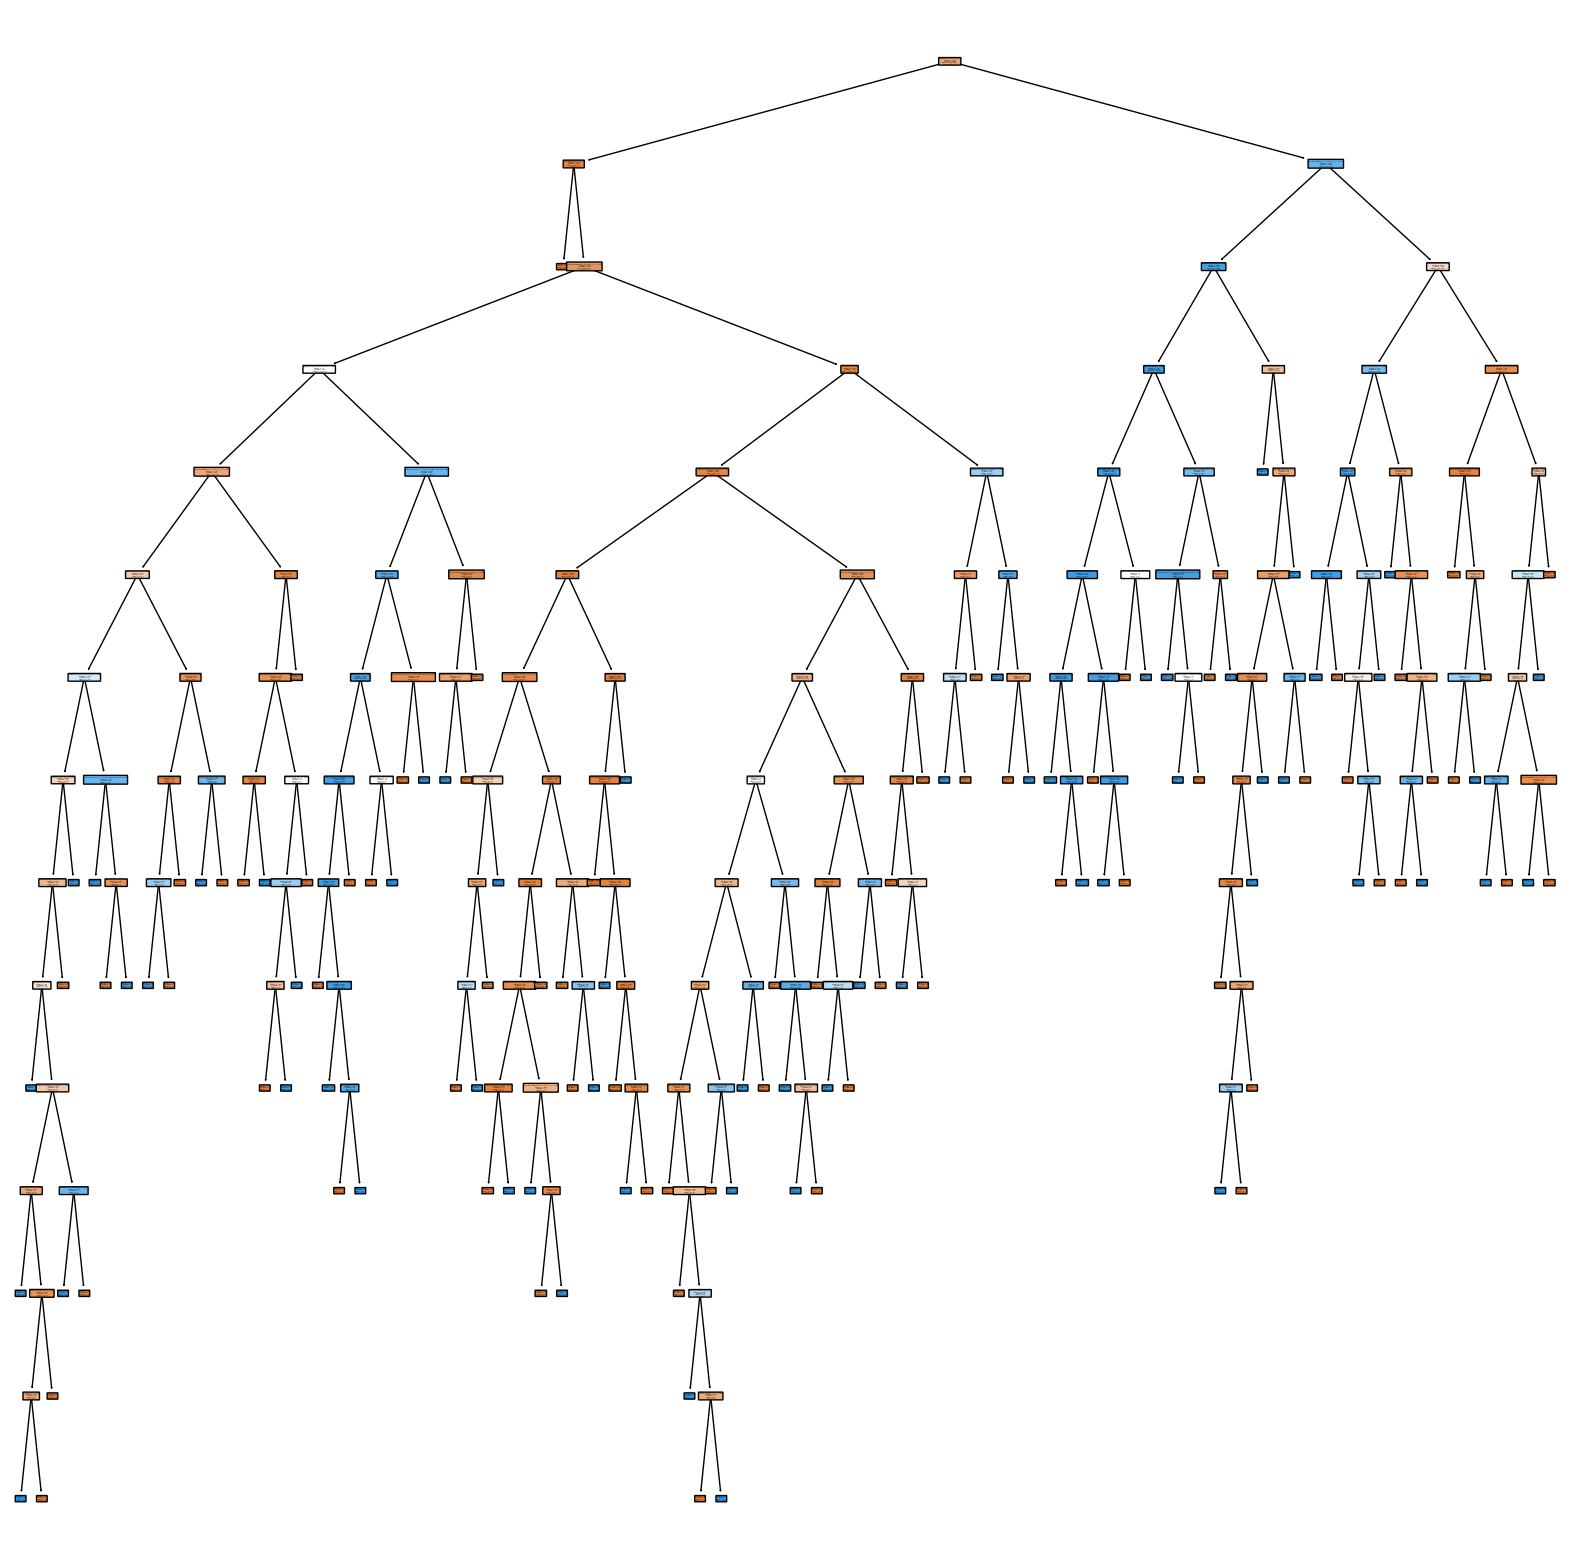

In [17]:
plt.figure(figsize = (20, 20))
decisionTree = plot_tree(decision_tree = decTree, feature_names = x.columns, class_names = ['no', 'yes'], filled = True, rounded = True)


In [18]:
dt = []
dTreeModels = []
for i in range(1, 15):
    dt.append(DecisionTreeClassifier(criterion = 'entropy', max_depth = i, random_state=1))

for i in dt:
    i.fit(x,y)
    dTreeModels.append(i)

In [19]:
result = []
dtreeID = []
i = 1
avg_acc = []
stdev = []

Ten_fold = model_selection.StratifiedKFold(n_splits=10)
for model in dTreeModels:
    j = 'Depth '
    f = str(i)
    i += 1
    cross_validation = model_selection.cross_val_score(model, x, y, cv = Ten_fold, scoring = 'accuracy')
    result.append(cross_validation)
    dtreeID.append(j + f)

for i in range(len(result)):
    avg_acc.append(result[i].mean())
    stdev.append(result[i].std())

data = {'Decision Tree Depth': dtreeID, 'Accuracy': avg_acc, 'Standard Deviation': stdev}

DTreeResults = pd.DataFrame(data)

DTreeResults

,Decision Tree Depth,Accuracy,Standard Deviation
0,Depth 1,0.914345,0.007182
1,Depth 2,0.922618,0.008399
2,Depth 3,0.938154,0.006089
3,Depth 4,0.960074,0.006147
4,Depth 5,0.964138,0.007421
5,Depth 6,0.968203,0.006323
6,Depth 7,0.966752,0.007368
7,Depth 8,0.968206,0.004963
8,Depth 9,0.969512,0.006491
9,Depth 10,0.970964,0.004002


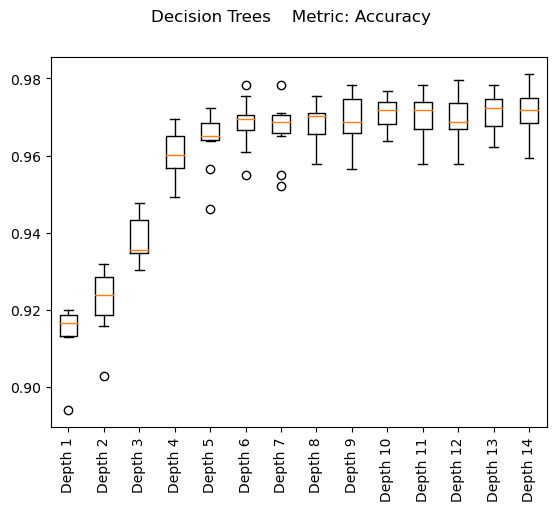

In [20]:
fig = plt.figure()
fig.suptitle('Decision Trees    Metric: Accuracy')
ax = fig.add_subplot(1,1,1)
plt.boxplot(result)
ax.set_xticklabels(dtreeID)
ax.tick_params(axis='x', labelrotation=90)
plt.show()

In [21]:
# Random Forests
m = [10, 11, 13,14]
rf = []
randomForestModels = []
for i in m:
    rf.append(RandomForestClassifier(n_estimators = 50, criterion = 'entropy', max_depth = i, random_state=1))
for i in rf:
    i.fit(x,y)
    randomForestModels.append(i)

In [22]:
result_rf = []
rfID = m
avg_acc_rf = []
stdev_rf = []

Ten_fold = model_selection.StratifiedKFold(n_splits=10)
for model in randomForestModels:
    cross_validation = model_selection.cross_val_score(model, x, y, cv = Ten_fold, scoring = 'accuracy')
    result_rf.append(cross_validation)

for i in range(len(result_rf)):
    avg_acc_rf.append(result_rf[i].mean())
    stdev_rf.append(result_rf[i].std())

data_rf = {'Random Forests (n = 50) Depth': rfID, 'Accuracy': avg_acc_rf, 'Standard Deviation':  stdev_rf}

RandomForestResults = pd.DataFrame(data_rf)

RandomForestResults

,Random Forests (n = 50) Depth,Accuracy,Standard Deviation
0,10,0.979385,0.005797
1,11,0.980547,0.004312
2,13,0.980547,0.006528
3,14,0.980692,0.005391


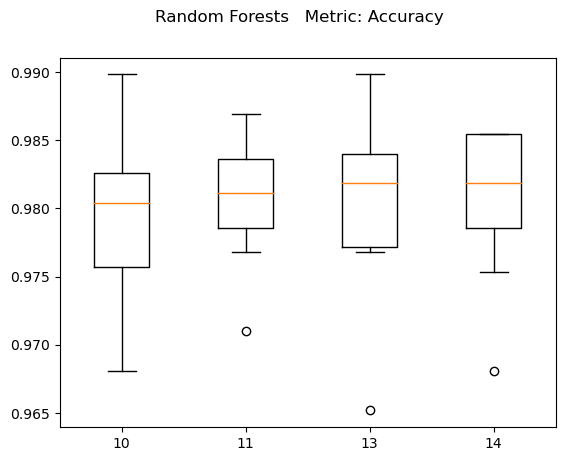

In [23]:
fig = plt.figure()
fig.suptitle('Random Forests   Metric: Accuracy')
ax = fig.add_subplot(1,1,1)
plt.boxplot(result_rf)
ax.set_xticklabels(rfID)
plt.show()

In [24]:
knn = []
k_nearest_neighbors = []
for i in range(5,16):
    knn.append(KNeighborsClassifier(n_neighbors = i))
for i in knn:
    i.fit(x ,y)
    k_nearest_neighbors.append(i)

In [25]:
result_knn = []
knnID = []
i = 1
avg_acc_knn = []
stdev_knn = []

Ten_fold = model_selection.StratifiedKFold(n_splits=10)

for model_knn in k_nearest_neighbors:    
    j = ' - Nearest Neighbors'
    f = str(i + 4)
    i += 1
    cross_validation = model_selection.cross_val_score(model_knn, x, y, cv = Ten_fold, scoring = 'accuracy')
    result_knn.append(cross_validation)
    knnID.append(f + j)

for i in range(len(result_knn)):
    avg_acc_knn.append(result_knn[i].mean())
    stdev_knn.append(result_knn[i].std())

data_knn = {'K - Nearest Neighbors': knnID, 'Average f-score': avg_acc_knn, 'Standard Deviation':  stdev_knn}

k_nearest_neighbors = pd.DataFrame(data_knn)

k_nearest_neighbors

/Users/harishbhupalam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/harishbhupalam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

,K - Nearest Neighbors,Average f-score,Standard Deviation
0,5 - Nearest Neighbors,0.958623,0.005125
1,6 - Nearest Neighbors,0.957172,0.005321
2,7 - Nearest Neighbors,0.957027,0.004817
3,8 - Nearest Neighbors,0.957463,0.004104
4,9 - Nearest Neighbors,0.957027,0.004601
5,10 - Nearest Neighbors,0.956591,0.005562
6,11 - Nearest Neighbors,0.954995,0.005148
7,12 - Nearest Neighbors,0.954559,0.006020
8,13 - Nearest Neighbors,0.954123,0.005325
9,14 - Nearest Neighbors,0.954123,0.005399


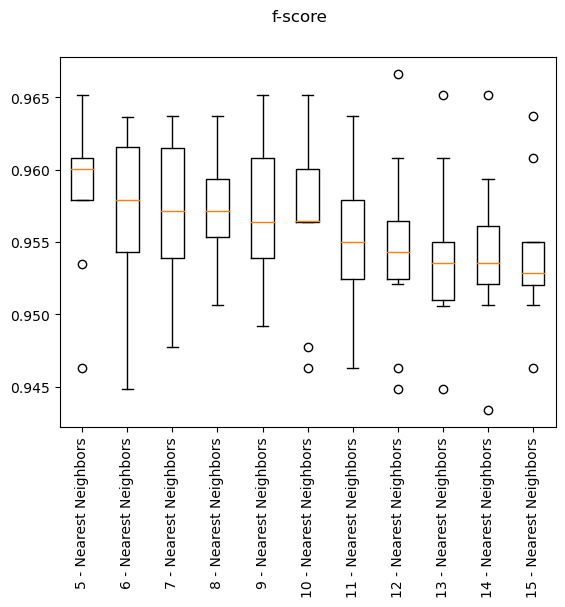

In [26]:
fig = plt.figure()
fig.suptitle('f-score')
ax = fig.add_subplot(1,1,1)
plt.boxplot(result_knn)
ax.set_xticklabels(knnID)
ax.tick_params(axis='x', labelrotation=90)
plt.show()

In [27]:
logistic_reg = []

logistic_reg.append(('Logistic Regression', LogisticRegression()))

logistic_reg[0][1].fit(x, y)

/Users/harishbhupalam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
results_lr = []
lrID = ['Logistic Regression Result']
avg_acc_lr = []
stdev_lr = []

Ten_fold = model_selection.StratifiedKFold(n_splits=10)

cross_validation = model_selection.cross_val_score(logistic_reg[0][1], x, y, cv = Ten_fold, scoring = 'accuracy')
results_lr.append(cross_validation)

avg_acc_lr.append(results_lr[0].mean())
stdev_lr.append(results_lr[0].std())

data_lr = {'Logistic Regression': lrID, 'accuracy': avg_acc_lr, 'Standard Deviation': stdev_lr}

logistic_regression = pd.DataFrame(data_lr)

logistic_regression

/Users/harishbhupalam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/harishbhupalam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

,Logistic Regression,accuracy,Standard Deviation
0,Logistic Regression Result,0.863532,0.006471


In [29]:
model = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', max_depth = 11, random_state=1)
model.fit(x,y)

RandomForestClassifier(criterion='entropy', max_depth=11, n_estimators=50,
                       random_state=1)

In [30]:
# We have already fit the scaler to X_train
# transforming the Test data using that scaler
x1 = scaler.transform(x_test)

# convert the numpy array back to a dataframe
x1 = pd.DataFrame(x1, columns=x_test.columns)

In [31]:
predictions = model.predict(x1)
predictions

array([0, 0, 0, ..., 1, 1, 0])

In [32]:
confusion_mat = confusion_matrix(y_test, predictions)
confusion_mat

array([[1888,  411],
       [ 140,  514]])